<a href="https://colab.research.google.com/github/meidytarully/UTS_DataMining/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT DATASET AND LIBRARY**

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**LOAD BREAST CANCER DATASET**

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

**PREPROCESSING DATA WITH STANDARIZATION AND PCA**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**KMEANS CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

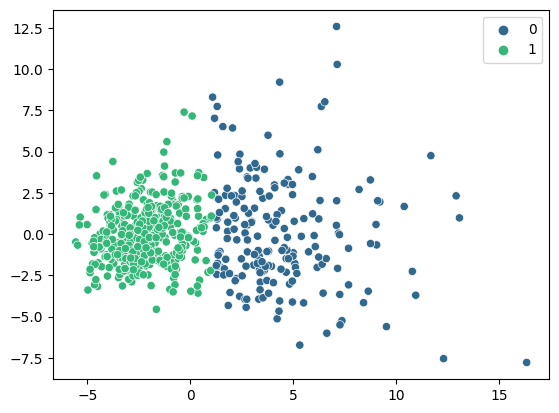

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
y_kmeans = kmeans.fit_predict(X_pca)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_kmeans, palette='viridis')

**AGGLOMERATIVE CLUSTERING**

<Axes: >

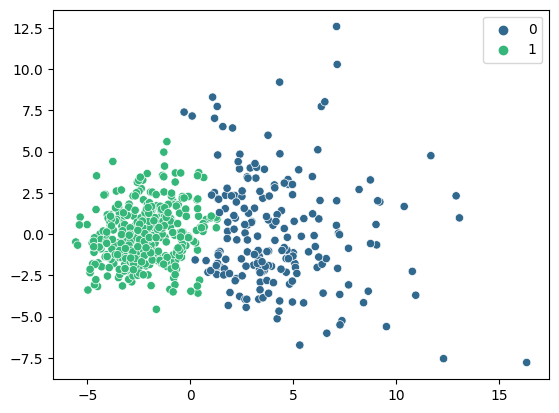

In [ ]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_agglo = agglo.fit_predict(X_pca)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_agglo, palette='viridis')

**DBSCAN CLUSTERING**

<Axes: >

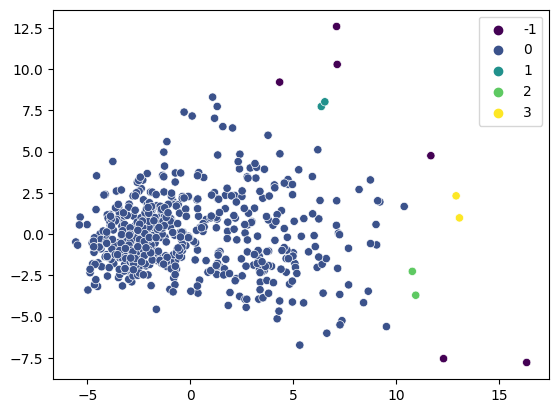

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=2)
y_dbscan = dbscan.fit_predict(X_pca)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_dbscan, palette='viridis')

**SILHOUETTE SCORE**

In [ ]:
kmeans_silhouette = silhouette_score(X_pca, kmeans.labels_)
agg_silhouette = silhouette_score(X_pca, agglo.labels_)
dbscan_silhouette = silhouette_score(X_pca, dbscan.labels_)

print("Hasil evaluasi dengan Silhouette Score:")
print("KMeans Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

Hasil evaluasi dengan Silhouette Score:
KMeans Silhouette Score: 0.5084690190671225
Agglomerative Clustering Silhouette Score: 0.5046397728338283
DBSCAN Silhouette Score: 0.44201956139147686
